In [96]:
#alle packages die ich verwenden werde, hat chatgpt gesagt

from uncertainties import ufloat
from uncertainties.umath import sqrt
from uncertainties import unumpy as unp
import matplotlib.pyplot as plt
import numpy as np
from uncertainties.umath import *
import pandas as pd
from uncertainties.umath import sin, radians #achtung in bogenmaß eingeben
from IPython.display import display, Latex

# Brechung, Dispersion und Spektroskopie

## Dispersionskurve eines optischen Glases

### Durchführung und Aufbau
Eine Quecksilberdampflampe dient als Lichtquelle. Mit einem Prismenspektrometer werden die Spektrallinien beobachtet. Zunächst wird ohne Prisma die Strahlrichtung ermittelt, danach das Prisma auf dem Prismentisch positioniert. Das Spektrum wird durch Drehen des Tisches eingestellt und die Stellung der minimalen Ablenkung durch ein Goniometer bestimmt. Für mindestens fünf Spektrallinien werden die Ablenkwinkel abgelesen und daraus die Brechungsindizes berechnet.
Im zweiten Teil wird das Prisma entfernt und das Spektrum mit einem automatischen Gitterspektrometer aufgenommen. Über ein Glasfaserkabel wird das Licht in das Gerät eingekoppelt und mit der Software OceanView ausgewertet, die die Wellenlängen der Emissionslinien ermittelt. Die Unsicherheiten entsprechen den Halbwertsbreiten der Peaks.

### Wichtige Formeln
Brechungsindex aus minimaler Ablenkung:
$$
n = \frac{\sin\left(\tfrac{\delta_{\min} + \varepsilon}{2}\right)}{\sin\left(\tfrac{\varepsilon}{2}\right)}
$$

Minimaler Ablenkwinkel:
$$
\delta_{\min} = \varphi_{2} - \varphi_{1}
$$

### Verwendete Geräte und Unsicherheiten
- Winkelablesung am Nonius: ± 30′ (Bogenminute)  
- Wellenlängenbestimmung im Gitterspektrometer: Halbwertsbreite abgeschätzt

### Ergebnisse


In [97]:
# 1.2.1 winkel der minimalen ablenkung mit dem goniometer

# ableseunsicherheit
au = 30/60 # 30 Bogenminuten

# 1. prismawinkel, ohne unsicherheit angenommen
alpha_deg = 60.0 # in grad


# 2. unabgelenkter winkel phi_1
phi_1 = ufloat((173*60+45)/(60), au) # wert und unsicherheit

# 3. abgelenkte winkel phi_2
phi_2 = unp.uarray([(133*60+25)/(60), (133*60+49)/(60), (134*60+5)/(60), (134*60+24)/(60), (135*60+6)/(60)], au) #violett, dunkelblau, türkis, grün, gelb 

# achtung auf angabe der winkel, in min??? 

# minimale ablenkung
delta_min = [phi_1 - phi for phi in phi_2]

# berechnung des brechungsindex
def brechungsindex(alpha_deg, delta):
    alpha_rad = np.radians(alpha_deg) # konstanter wert
    delta_rad = radians(delta)

    n = sin((alpha_rad + delta_rad)/2) / sin(alpha_rad / 2)
    return n

n_values = [brechungsindex(alpha_deg, delta) for delta in delta_min]

n_neu = unp.uarray(unp.nominal_values(n_values), 0.1) #gibt uns n mit angepasster (nicht berechneter) unsicherheit, weil die berechneten so klein sind, argumentiere mit ableseunsicherheit


# darstellung als tabelle (kein plan was abgeht)
data = []
for i, (delta, n) in enumerate(zip(delta_min, n_values), start=1):
    data.append({
        "Spektrallinie": i, #hier kann man auch eine liste mit farben machen, achtung auf die reihenfolge!! und achtung auf das i, das machts glaub ich kaputt
        "δ_min [°]": f"{delta.n:.2f} ± {delta.s:.2f}",
        "n": f"{n.n:.2f} ± {n.s:.2f}" # die zahlen vor f sagen, wie viele nachkommastellen angezeigt werden
    })

# pandas dataframe erstellen
df = pd.DataFrame(data)

# tabelle anzeigen
display(df)


,Spektrallinie,δ_min [°],n
0,1,40.33 ± 0.71,1.54 ± 0.01
1,2,39.93 ± 0.71,1.53 ± 0.01
2,3,39.67 ± 0.71,1.53 ± 0.01
3,4,39.35 ± 0.71,1.52 ± 0.01
4,5,38.65 ± 0.71,1.52 ± 0.01


### Spektrum einer Quecksilberlampe

In [98]:
#tabelle zur manuellen eintragung der wellenlängen
lambda_nm = unp.uarray([405, 436, 492, 546, 578], [0.5, 1, 1, 2, 2]) #wellenlängen in nm
lambda_nm_ohne_unsicherheiten = np.array([405, 436, 492, 546, 578])

farben = ["violett", "blau", "türkis", "grün", "gelb"]

wavelength_data = {
    "Spektrallinie": farben, #achtung auf die reihenfolge!!
    "λ [nm]": lambda_nm
}
df_lambda = pd.DataFrame(wavelength_data)

#tabelle anzeigen
print("\nWellenlängen, bestimmt mit OceanView")
display(df_lambda)



Wellenlängen, bestimmt mit OceanView


,Spektrallinie,λ [nm]
0,violett,405.0+/-0.5
1,blau,436.0+/-1.0
2,türkis,492.0+/-1.0
3,grün,546.0+/-2.0
4,gelb,578.0+/-2.0


### Dispersionskurve n(λ) des Prismas
 
 

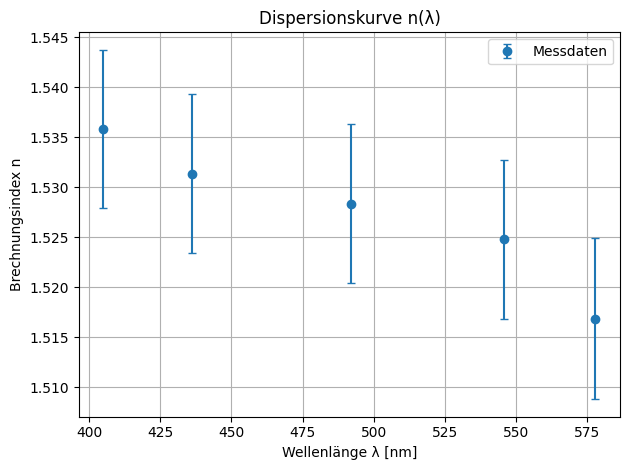

In [99]:
# tabelle brechungsindizes gegen wellenlänge

#für den plot mit fehlerbalken: unsicherheiten extrahieren
n_vals = unp.nominal_values(n_values)
n_errs = unp.std_devs(n_values)

#plot erstellen
plt.errorbar(lambda_nm_ohne_unsicherheiten, n_vals, yerr=n_errs, fmt='o', capsize=3, label="Messdaten") #x-achse, y-achse, vertikale fehlerbalken, punkte als marker, größe der balkenenden, legendenname
plt.xlabel("Wellenlänge λ [nm]")
plt.ylabel("Brechnungsindex n")
plt.title("Dispersionskurve n(λ)")
plt.grid(True) #rasterlinien anzeigen
plt.legend() #legende anzeigen
plt.tight_layout() #automatischer abstand
plt.show() #plot anzeigen




### Diskussion

Im Verglich mit Literaturwerten hat Borsilikat einen Brechungsindex von ca. 1,473 
(https://www.chemie.uni-leipzig.de/fileadmin/Fakult%C3%A4t_Chemie/Fakult%C3%A4t/Verwaltung_und_Service/Werkst%C3%A4tten/Materialspezifikationen_Borosilikatglas_und_Quarzglas.pdf, 24.10.2025)
In unserer Berechnung haben wir einen Brechungsindex zwischen 1,51 und 1,54 erhalten. 
Da der Brechungsindex von Flintglas bei 1,7-1,9 liegt (https://www.chemie.de/lexikon/Flintglas.html, 24.10.2025), nehmen wir an, dass es sich bei unserem Prisma um Borsilikat handelt und wir Fehler bei der Nullpunktmessung gemacht haben.

Aufgrund der schwierigen Ablesung der Winkel 


## Absorptions-Spektroskopie

### Durchführung
Für die Absorptionsmessung wird der Küvettenaufsatz am Gitterspektrometer angebracht und eine unbekannte Probe (A, B oder C) eingesetzt. Zuerst wird ein Referenzspektrum ohne Probe aufgenommen, anschließend ein Dunkelspektrum mit schwarzem Block zur Korrektur des thermischen Hintergrunds. Danach wird das Spektrum nach Durchgang durch die Probe gemessen. Die Software *OceanView* berechnet daraus automatisch die optische Dichte nach 
$$
OD = - \log T, \quad T = \frac{I_{\text{trans}}}{I_0}.
$$
Die Absorptionsmaxima werden bestimmt und mit den Literaturwerten von Neodym und Praseodym verglichen, um die Substanz zu identifizieren.

### Relevante Formeln
Transmission:
$$
T = \frac{I_{\text{trans}}}{I_0}
$$

Absorbanz:
$$
A = - \ln T
$$

### Ergebnisse
Absorptionsspektrum und Absorptionsmaxima einer unbekannten Flüssigkeit B
  

  

In [100]:
#vergleichstabelle

#neodym absorptionsmaxima
neodym_data = {
    "Farbe": ["grün", "grün", "gelb", "dunkelrot", "infrarot", "infrarot"],
    "λ [nm]": [510, 522, 578, 740, 799, 868]
}
df_neodym = pd.DataFrame(neodym_data)

#praseodym absorptionsmaxima
praseodym_data = {
    "Farbe": ["blau", "türkisblau", "türkis", "gelborange"],
    "λ [nm]": [444, 468, 481, 590]
}
df_praseodym = pd.DataFrame(praseodym_data)

#referenztabelle auswählen
df_literatur = df_neodym #sonst ändern

messwerte_von_oceanview = np.array([512, 522, 576, 741, 795, 865]) #gleiche länge wie referenztabelle oviously
messwerte_mit_unsicherheit = unp.uarray([512, 522, 576, 741, 795, 865], [2, 2, 5, 6, 5, 3])

#umwandeln in arrays
literaturwerte = df_literatur["λ [nm]"]

differenz = messwerte_von_oceanview - literaturwerte

#vergleichstabelle
vergleich_tabelle = pd.DataFrame({
    "Farbe": df_literatur["Farbe"],
    "λ Neodym [nm]": literaturwerte, #achtung hier auch wort neodym ändern wenns is
    "λ gemessen [nm]": messwerte_mit_unsicherheit,
    "Abweichung [nm]": differenz
})

display(vergleich_tabelle)


,Farbe,λ Neodym [nm],λ gemessen [nm],Abweichung [nm]
0,grün,510,512.0+/-2.0,2
1,grün,522,522.0+/-2.0,0
2,gelb,578,576+/-5,-2
3,dunkelrot,740,741+/-6,1
4,infrarot,799,795+/-5,-4
5,infrarot,868,865.0+/-3.0,-3




### Diskussion 

Es ist erkennbar, dass es sich bei bei der Probe B um Neodym handelt. (referenzwert aus der Tabelle der Versuchsanleitung entnommen)